In [75]:
# from desispec.io.spectra import read_spectra

import desiutil
from desispec.io import read_spectra

from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.table import Table, Column

from astropy.io import fits
get_ipython().run_line_magic('matplotlib', 'inline')
# Vstack and join
from astropy.table import vstack,hstack, Table, join, QTable

mpl.rc('font', size =12)

In [76]:
coadds = sorted(glob('/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd*.fits'))
coadds

['/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-0-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-1-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-2-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-3-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-4-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-5-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-6-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-7-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/redux/daily/tiles/68000/20200314/coadd-8-68000-20200314.fits',
 '/global/project/projectdirs/desi/spectro/red

# Plotting flux vs wavelength

In [87]:
def plot(file, n = 0,x=1):
    """Plots the flux vs wavelength of a coadd file.
    Default = 100 means plots all, otherwise specify how many plots do you want?
    third argument decides the step size"""
    spectra = read_spectra(file)
    wave = spectra.wave['brz']
    flux = spectra.flux['brz']
    ivar = spectra.ivar['brz']
    if n==0:
        for i in range (0,len(flux),x):
            plt.figure()
            plt.plot(wave,flux[i],label = "Flux")
            plt.legend(loc='best')
            plt.show
            plt.title("Flux i = {1}".format(n, i))
    else:
        for i in range (n):
            plt.figure()
            plt.plot(wave,flux[i],label = "Flux")
            plt.xlabel('Wave')
            plt.ylabel('Flux')
            plt.legend(loc='best')
            plt.show
            plt.title("Flux i = {1}".format(n, i))

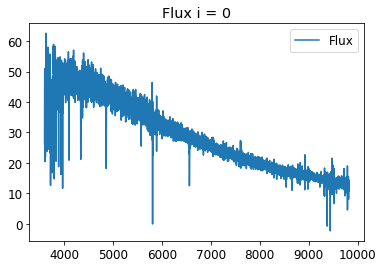

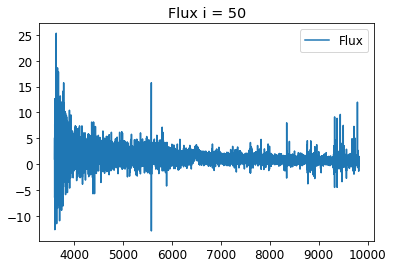

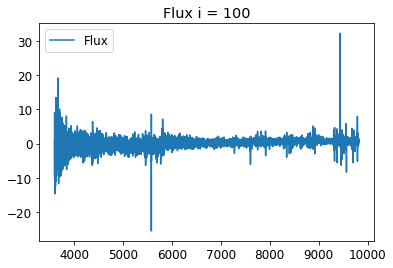

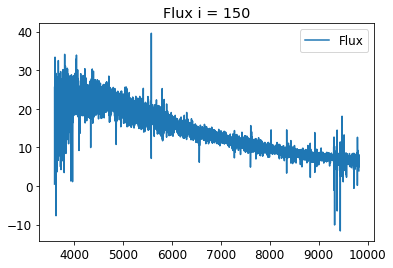

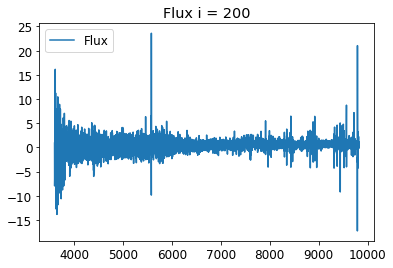

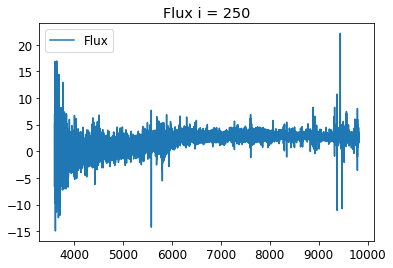

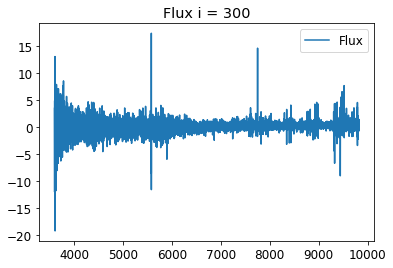

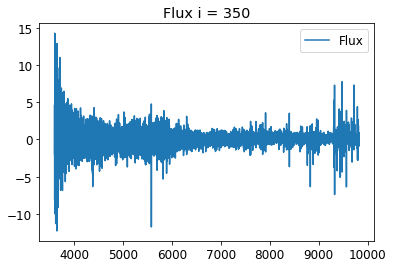

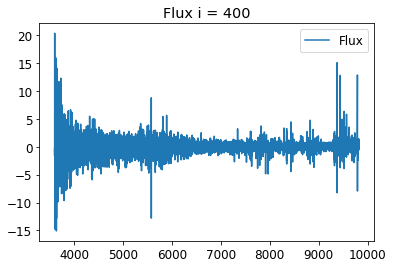

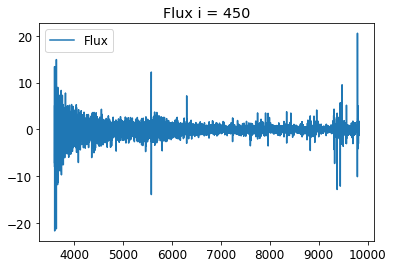

In [93]:
plot(coadds[0],x=50)

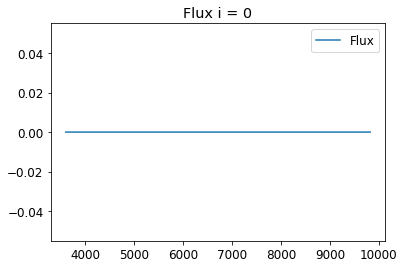

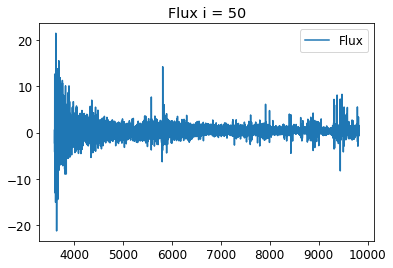

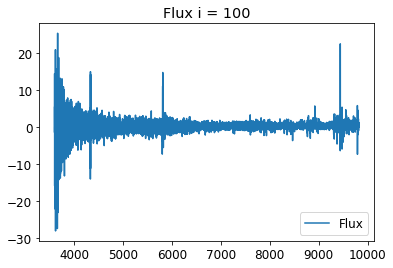

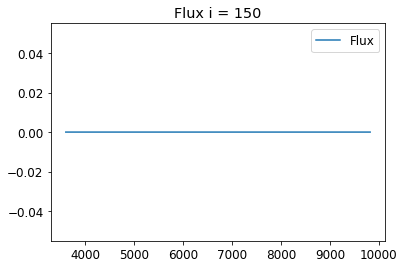

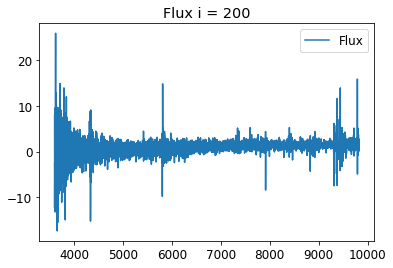

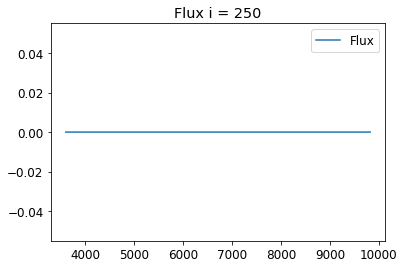

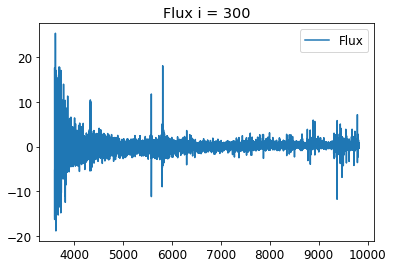

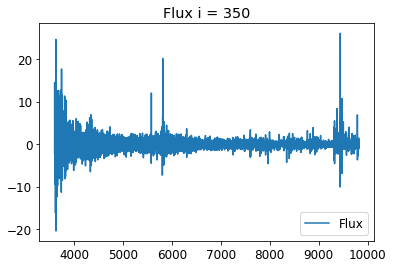

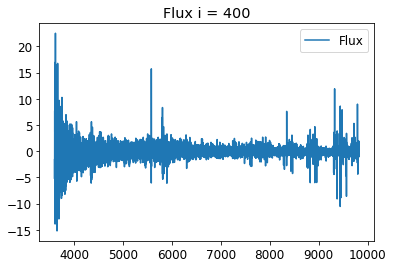

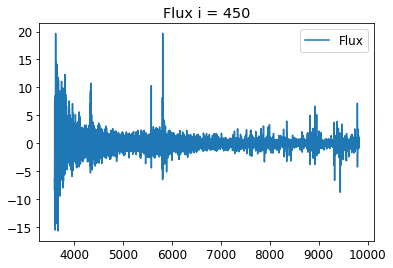

In [92]:
plot(coadds[1],x=50)

In [51]:
len(wave), len(flux)

(7781, 500)

# RA DEC 

In [ ]:
spectra = read_spectra(coadds[5])

In [35]:
ra, dec = [spectra.fibermap['TARGET_{}'.format(_)] for _ in ['RA', 'DEC']]
x,  y   = [spectra.fibermap['FIBERASSIGN_{}'.format(_)] for _ in 'XY']

[None]

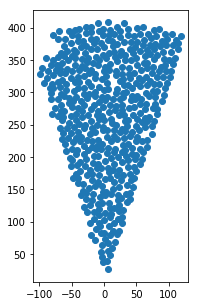

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.scatter(x, y)
ax.set(aspect='equal')

### More systematic approach

In [90]:
def ra_dec(coadds):
    ra_list = []
    dec_list = []
    for i in range(len(coadds)):
        spectra = read_spectra(coadds[i])
        ra, dec = [spectra.fibermap['TARGET_{}'.format(_)] for _ in ['RA', 'DEC']]
        x,  y   = [spectra.fibermap['FIBERASSIGN_{}'.format(_)] for _ in 'XY']
        ra=np.array(ra)
        dec = np.array(dec)
        ra_list.append(ra)
        dec_list.append(dec)
    t = QTable([ra_list, dec_list],names=('ra','dec'),meta={'name': 'ra_dec Table'})
    return t

In [91]:
ra_dec(coadds)

ra [500],dec [500]
float64,float64
214.4915008097018 .. 214.73276480047178,51.85985927893284 .. 53.20942447024862
213.49654054184617 .. 214.22690250847458,52.020834507539405 .. 53.12716791223441
212.65380834405704 .. 214.2155414350863,52.49516889786745 .. 53.36572610782323
212.08825820263456 .. 212.71784069835957,53.38526307772796 .. 54.1331237099254
214.60768312433945 .. 213.91204397801434,53.49387154249581 .. 54.71633724814657
214.71118145057977 .. 215.1342299173409,53.5066368200524 .. 54.959309248575835
214.85561382809993 .. 215.64028698304003,53.510231095422284 .. 54.903594936198594
215.00211757256147 .. 217.12501734785516,53.44314686794688 .. 54.14725863382484
216.68433360815573 .. 216.15275133078808,52.61024474298894 .. 53.380667644692814
